In [1]:
#Importing all the necessary Libraries
import numpy as np 
import pandas as pd 
import pywt
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.patheffects as PathEffects
import seaborn as sns
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

import keras
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History 

Using TensorFlow backend.


In [3]:
#Attach the path to your dataset.
df=pd.read_csv('D:/Ear_Recurrent/eardataset.csv')
df=pd.read_csv('D:/Ear_Recurrent/eardataset.csv', encoding = "ISO-8859-1")

In [4]:
df_again = pd.read_csv('D:/Ear_Recurrent/eardataset.csv')
df_again.head(3)

,unnamed,subject,session,ear,buffer,block,data_0,data_1,data_2,data_3,...,data_650,data_651,data_652,data_653,data_654,data_655,data_656,data_657,data_658,data_659
0,40,0,0,left,A,40,0.000062,0.000063,0.000064,0.000067,...,-0.000046,-0.000048,-0.000049,-0.000051,-0.000052,-0.000052,-0.000053,-0.000053,-0.000052,-0.000051
1,41,0,0,left,A,41,0.000063,0.000064,0.000065,0.000067,...,-0.000039,-0.000040,-0.000042,-0.000043,-0.000044,-0.000044,-0.000044,-0.000044,-0.000044,-0.000042
2,42,0,0,left,A,42,0.000065,0.000066,0.000067,0.000069,...,-0.000042,-0.000043,-0.000045,-0.000046,-0.000047,-0.000047,-0.000047,-0.000047,-0.000047,-0.000045


In [5]:
df_again=df_again.drop(["unnamed", "session","ear","buffer","block"],axis=1)

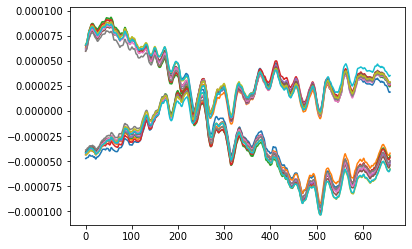

In [6]:
#View the signals in the dataset
for i in range(0,20):
    disp = df_again.iloc[i,1:661].values
    plt.plot(disp)
#10 consecutive signals are similar in a dataset while the next consecutive 10 are not.

In [7]:
#creating a dataFrame for the dataset
def subject0(subjectno, sessionno, earname, bufferid):
    dfu0=df.groupby(['subject', 'session', 'ear', 'buffer']).get_group((subjectno, sessionno, earname, bufferid)).iloc[-10:]
    return dfu0

x=subject0(34,0,'left','B')
x['subject'].iloc[0]
print(x.shape)
print(x)

(10, 666)
      unnamed  subject  session   ear buffer  block    data_0    data_1  \
2730    30662       34        0  left      B    272  0.000014  0.000013   
2731    30663       34        0  left      B    273  0.000014  0.000013   
2732    30664       34        0  left      B    274  0.000014  0.000013   
2733    30665       34        0  left      B    275  0.000015  0.000014   
2734    30666       34        0  left      B    276  0.000014  0.000013   
2735    30667       34        0  left      B    277  0.000015  0.000014   
2736    30668       34        0  left      B    278  0.000015  0.000014   
2737    30669       34        0  left      B    279  0.000013  0.000013   
2738    30670       34        0  left      B    280  0.000014  0.000014   
2739    30671       34        0  left      B    281  0.000015  0.000014   

        data_2    data_3  ...  data_650  data_651  data_652  data_653  \
2730  0.000013  0.000013  ...  0.000013  0.000012  0.000011  0.000011   
2731  0.000013  0.

In [16]:
#Creating Input and Labels DataFrame

allInputTEOAEsignalsAllSubjects = pd.DataFrame([])
allOutputLabelsAllSubjects = pd.DataFrame([])
for a in range(54):
    print(a)
    df1 = pd.DataFrame([])
    b=[0, 1]              # sessions 0 and 1
    c=['left', 'right']   # ears 
    d=['A', 'B']          # buffers
    
    allFeatures =  pd.DataFrame([])
    allInputFeatures =  pd.DataFrame([])
    outputLabel =  pd.DataFrame([])
    fftValues =  pd.DataFrame([])
    psdValues =  pd.DataFrame([])
    autocorrValues = pd.DataFrame([])
        
    for q,r,s in [(q,r,s) for q in b for r in c for s in d]:
        
        # df1 contains all the 80 TEOAE signals of subject a
        df1 = df1.append(subject0(a,q,r,s))
        allInputFeatures = df1.iloc[:,6:]
    
    allInputTEOAEsignalsAllSubjects = pd.concat([allInputTEOAEsignalsAllSubjects.reset_index(drop=True),
                                                 allInputFeatures.reset_index(drop=True)], axis=0)
    # the following gets you the class label <= subject no.[0,1,2,...,53]
    outputLabel = df1.iloc[:,1] 
    print("OutputLabel:",outputLabel)
    #allOutputLabelsAllSubjects = allOutputLabelsAllSubjects.append(outputLabel)
    #append didn't work for output so using pd.cat instead
    allOutputLabelsAllSubjects = pd.concat([allOutputLabelsAllSubjects.reset_index(drop=True),
                                            outputLabel.reset_index(drop=True)], axis=0)
    print(allInputTEOAEsignalsAllSubjects.shape)
    print(allOutputLabelsAllSubjects.shape)


0
OutputLabel: 0     0
1     0
2     0
3     0
4     0
     ..
75    0
76    0
77    0
78    0
79    0
Name: subject, Length: 80, dtype: int64
(80, 660)
(80, 1)
1
OutputLabel: 80     1
81     1
82     1
83     1
84     1
      ..
155    1
156    1
157    1
158    1
159    1
Name: subject, Length: 80, dtype: int64
(160, 660)
(160, 1)
2
OutputLabel: 160    2
161    2
162    2
163    2
164    2
      ..
235    2
236    2
237    2
238    2
239    2
Name: subject, Length: 80, dtype: int64
(240, 660)
(240, 1)
3
OutputLabel: 240    3
241    3
242    3
243    3
244    3
      ..
315    3
316    3
317    3
318    3
319    3
Name: subject, Length: 80, dtype: int64
(320, 660)
(320, 1)
4
OutputLabel: 320    4
321    4
322    4
323    4
324    4
      ..
395    4
396    4
397    4
398    4
399    4
Name: subject, Length: 80, dtype: int64
(400, 660)
(400, 1)
5
OutputLabel: 400    5
401    5
402    5
403    5
404    5
      ..
475    5
476    5
477    5
478    5
479    5
Name: subject, Length: 80, dt

Name: subject, Length: 80, dtype: int64
(3520, 660)
(3520, 1)
44
OutputLabel: 3520    44
3521    44
3522    44
3523    44
3524    44
        ..
3595    44
3596    44
3597    44
3598    44
3599    44
Name: subject, Length: 80, dtype: int64
(3600, 660)
(3600, 1)
45
OutputLabel: 3600    45
3601    45
3602    45
3603    45
3604    45
        ..
3675    45
3676    45
3677    45
3678    45
3679    45
Name: subject, Length: 80, dtype: int64
(3680, 660)
(3680, 1)
46
OutputLabel: 3680    46
3681    46
3682    46
3683    46
3684    46
        ..
3755    46
3756    46
3757    46
3758    46
3759    46
Name: subject, Length: 80, dtype: int64
(3760, 660)
(3760, 1)
47
OutputLabel: 3760    47
3761    47
3762    47
3763    47
3764    47
        ..
3835    47
3836    47
3837    47
3838    47
3839    47
Name: subject, Length: 80, dtype: int64
(3840, 660)
(3840, 1)
48
OutputLabel: 3840    48
3841    48
3842    48
3843    48
3844    48
        ..
3915    48
3916    48
3917    48
3918    48
3919    48
Name:

In [17]:
# save extracted dataframe locally
X=pd.DataFrame([])
y=pd.DataFrame([])
xsave = pd.DataFrame([])
ysave = pd.DataFrame([])
X = allInputTEOAEsignalsAllSubjects
y = allOutputLabelsAllSubjects
xsave = X
ysave = y
#xsave.to_pickle('dataX.pkl')
#ysave.to_pickle('labelY.pkl')

In [20]:
#Splitting 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
#Checking the dimensions of train and test array
print(np.asarray(X_train).shape)
print(np.asarray(X_test).shape)
print(np.asarray(y_train).shape)
print(np.asarray(y_test).shape)
labels_train = list(map(lambda x: int(x), np.asarray(y_train)))
print(np.asarray(labels_train).shape)

(3456, 660)
(864, 660)
(3456, 1)
(864, 1)
(3456,)


In [22]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

###### Continuous Wavelets Transform on the Data-signal

In [36]:
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot

train_size = X_train.shape[0]
test_size= X_test.shape[0]
rp = RecurrencePlot(threshold='point', percentage=20)

#########################################################
### creating a tensor to store CWT matrices of train egs#
#########################################################
train_data_cwt = np.ndarray(shape=(train_size, 660, 660)) 

for ii in range(0,train_size):
    if ii % 50 == 0: #len(X_train) == 0:
        print(ii)
    signal = X_train[[ii]]
    X_rp = rp.fit_transform(signal)
    coeff_ = X_rp[:,:660]
    train_data_cwt[ii, :, :] = coeff_
    #train_data_cwt[:, :, ii] = coeff_

###########################################################
### creating a tensor to store CWT matrices of test egs ###
###########################################################
test_data_cwt = np.ndarray(shape=(test_size, 660, 660))

for ii in range(0,test_size):
    if ii % 50 == 0:
        print(ii)
    signal = X_test[[ii]]
    X_rp = rp.fit_transform(signal)
    coeff_ = X_rp[:,:660]
    test_data_cwt[ii, :, :] = coeff_
    #test_data_cwt[:, :, ii] = coeff_

###########################################################
### convert the labels from float to int of train and test egs
###########################################################
labels_train = list(map(lambda x: int(x), np.asarray(y_train)))
labels_test = list(map(lambda x: int(x), np.asarray(y_test)))

###########################################################
### putting all the train and test CWT data             ###
###########################################################
x_train = train_data_cwt
y_train = list(labels_train[:train_size])
x_test = test_data_cwt
y_test = list(labels_test[:test_size])

0
0


In [37]:
#Convert the labels to array
y_test_np = np.asarray(y_test)
y_train_np = np.asarray(y_train)

In [38]:
print(np.asarray(x_train).shape)
print(np.asarray(x_test).shape)
print(np.asarray(y_train).shape)
print(np.asarray(y_test).shape)
print(len(x_train))
print(len(x_test))

(7, 660, 660)
(3, 660, 660)
(7,)
(3,)
7
3


###### Feature extraction by CNN

In [39]:
from keras.applications.resnet50 import ResNet50
history = History()
 
img_x = x_train.shape[1] # = no.of samples of each TEOAE signal = 660
img_y = x_train.shape[2] 
img_z = 3

in_shape = (img_x, img_y, img_z)
print(in_shape)
base_model = ResNet50(weights='imagenet',include_top=False,input_shape=in_shape,classes=54)

(660, 660, 3)


C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [40]:
#ResNet50:
model= Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 21, 21, 2048)      23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 903168)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              903169000 
Total params: 926,756,712
Trainable params: 926,703,592
Non-trainable params: 53,120
_________________________________________________________________


In [41]:
#ResNet50:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape)
print(x_test.shape)
num_classes = 54
val1 = x_train.shape[0]
val2 = x_test.shape[0]


x_train_cnn = x_train.reshape(val1,660,660,1)#len(x_train),img_x, img_y, img_z)
x_test_cnn = x_test.reshape(val2,660,660,1)#len(x_test),img_x, img_y, img_z)
rgb_train = np.repeat(x_train_cnn, 3, -1)
rgb_test = np.repeat(x_test_cnn,3,-1)
# y_train_cnn = keras.utils.to_categorical(y_train_np, num_classes)
# y_test_cnn = keras.utils.to_categorical(y_test_np, num_classes)

(7, 660, 660)
(3, 660, 660)


In [42]:
#Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
#obtain the flattened output for training
features_xtrain=model.predict(rgb_train) #training
print(features_xtrain.shape)

(7, 1000)


In [44]:
#Flattened output for Testing
features_xtest=model.predict(rgb_test) #testing
features_xtest.shape

(3, 1000)

In [45]:
print(features_xtrain.shape)
print(features_xtest.shape)

(7, 1000)
(3, 1000)


In [23]:
import pickle
features_xtrain = pickle.load(open("D:/Ear_Recurrent/features_xtrain.pkl","rb"))
features_xtest = pickle.load(open("D:/Ear_Recurrent/features_xtest.pkl","rb"))

In [24]:
print(features_xtrain.shape)
print(features_xtest.shape)

(3456, 1000)
(864, 1000)


In [25]:
train_size = X_train.shape[0]
test_size= X_test.shape[0]
labels_train = list(map(lambda x: int(x), np.asarray(y_train)))
labels_test = list(map(lambda x: int(x), np.asarray(y_test)))

y_train = list(labels_train[:train_size])
y_test = list(labels_test[:test_size])
#Convert the labels to array
y_test_np = np.asarray(y_test)
y_train_np = np.asarray(y_train)

### Classification

In [47]:
 #SVM classifier
svm=SVC(kernel='linear')
svm.fit(features_xtrain,y_train_np)

#training accuracy
acc_svm_train=round(svm.score(features_xtrain,y_train_np)*100,2)
print("Training Accuracy:",acc_svm_train)

#testing accuracy
t0 = time.clock()
acc_svm_test=round(svm.score(features_xtest,y_test_np)*100,2)
print("Testing accuracy:",acc_svm_test)
#print(classification_report(y_test_np, pred_test))
t1= (time.clock() - t0)
print("Svm time:",t1)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = svm.predict(features_xtest)
print("precision:", precision_score(y_test_np, y_pred, average='macro'))
print("Recall:", recall_score(y_test_np, y_pred, average='macro'))

Training Accuracy: 100.0


C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


Testing accuracy: 99.88
Svm time: 1.874123900000086


C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


precision: 0.9984567901234568
Recall: 0.9988425925925926


In [48]:
# MLP classification
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,150,100), max_iter=50, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=0,tol=0.000001)
mlp_clf.fit(features_xtrain, y_train_np)
t0 = time.clock()
pred_test = mlp_clf.predict(features_xtest) #testing accuracy
t1= time.clock() - t0
print("MLP time:", t1)
print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("precision:", precision_score(y_test_np, pred_test, average='macro'))
print("Recall:", recall_score(y_test_np, pred_test, average='macro'))

Iteration 1, loss = 3.94247478
Iteration 2, loss = 3.54944254
Iteration 3, loss = 3.00721069
Iteration 4, loss = 2.47220485
Iteration 5, loss = 1.97637696
Iteration 6, loss = 1.50337064
Iteration 7, loss = 1.16030955
Iteration 8, loss = 0.85537077
Iteration 9, loss = 0.64618994
Iteration 10, loss = 0.46368296
Iteration 11, loss = 0.34599833
Iteration 12, loss = 0.25745301
Iteration 13, loss = 0.17940826
Iteration 14, loss = 0.13837765
Iteration 15, loss = 0.10612882
Iteration 16, loss = 0.09206462
Iteration 17, loss = 0.07196790
Iteration 18, loss = 0.05743365
Iteration 19, loss = 0.04747353
Iteration 20, loss = 0.03987830
Iteration 21, loss = 0.03308893
Iteration 22, loss = 0.02895680
Iteration 23, loss = 0.02627003
Iteration 24, loss = 0.02267149
Iteration 25, loss = 0.01915543
Iteration 26, loss = 0.01780001
Iteration 27, loss = 0.01547189
Iteration 28, loss = 0.01408107
Iteration 29, loss = 0.01276229
Iteration 30, loss = 0.01191787
Iteration 31, loss = 0.01114762
Iteration 32, los

C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


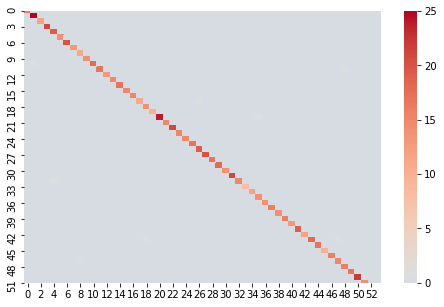

In [24]:
# Plotting the Confusion matrix
cm = confusion_matrix(y_test_np, pred_test)
plt.figure(figsize=(8,5))
sns.heatmap(cm, center=True, cmap='coolwarm')
plt.show()

In [49]:
#Random Forest Classifier

# Create the model with 100 trees
model_rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model_rf.fit(features_xtrain, y_train_np)
t0 = time.clock()
pred_test = model_rf.predict(features_xtest) #testing accuracy
t1= time.clock() - t0
print("RF time:", t1)

print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("precision:", precision_score(y_test_np, pred_test, average='macro'))
print("Recall:", recall_score(y_test_np, pred_test, average='macro'))

RF time: 0.07498209999994288
Accuracy: 
99.30555555555556
Confusion Matrix :
[[16  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 13  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 23]]
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.96      1.00      0.98        25
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        14
          10       1.00      0.95      0.97        19
          11       1.00      0.94      0.97        18
          12       1.00      1.00      1.00        13


C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


In [50]:
# K nearest neighbours algorithm 
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(features_xtrain, y_train_np) 
t0 =time.clock()
pred_test = knn.predict(features_xtest) #testing accuracy
t1= time.clock() -t0
print("KNN time", t1)
print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("precision:", precision_score(y_test_np, pred_test, average='macro'))
print("Recall:", recall_score(y_test_np, pred_test, average='macro'))

C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


KNN time 0.3241272000000208
Accuracy: 
98.61111111111111
Confusion Matrix :
[[16  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 23]]
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        25
           2       0.92      0.92      0.92        12
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        14
           6       0.91      1.00      0.95        20
           7       1.00      1.00      1.00        13
           8       0.92      1.00      0.96        11
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        19
          11       1.00      0.94      0.97        18
          12       0.93      1.00      0.96        13
 

C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


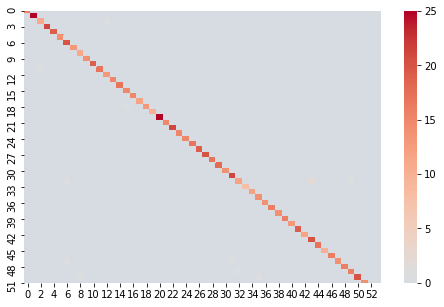

In [28]:
cm = confusion_matrix(y_test_np, pred_test)

plt.figure(figsize=(8,5))
sns.heatmap(cm, center=True, cmap='coolwarm')
plt.show()

In [51]:
# XGBoost classifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(features_xtrain, y_train_np)
t0 = time.clock()
pred_test = model.predict(features_xtest) #testing accuracy
t1= time.clock() - t0
print("XGBoost time :", t1)
print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("precision:", precision_score(y_test_np, pred_test, average='macro'))
print("Recall:", recall_score(y_test_np, pred_test, average='macro'))

C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


XGBoost time : 0.5844064000002618
Accuracy: 
96.75925925925925
Confusion Matrix :
[[14  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 22]]
Report : 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.96      1.00      0.98        25
           2       0.92      1.00      0.96        12
           3       1.00      0.95      0.98        21
           4       1.00      0.95      0.97        19
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        13
           8       0.92      1.00      0.96        11
           9       0.93      1.00      0.97        14
          10       0.89      0.89      0.89        19
          11       0.94      0.94      0.94        18
          12       0.93      1.00      0.96      

C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


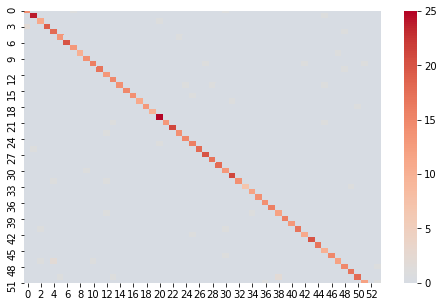

In [30]:
cm = confusion_matrix(y_test_np, pred_test)

plt.figure(figsize=(8,5))
sns.heatmap(cm, center=True, cmap='coolwarm')
plt.show()

In [36]:
xsave = pd.DataFrame([])
ysave = pd.DataFrame([])
train_ft = pd.DataFrame(features_xtrain)
test_ft = pd.DataFrame(features_xtest)
xsave = train_ft
ysave = test_ft
xsave.to_pickle('features_xtrain.pkl')
ysave.to_pickle('features_xtest.pkl')